In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dp


## **Dataset Publik E-Commerce Brasil oleh Olist**

The dataset has information of 100k orders from 2016 to 2018 made in several markets in Brazil. This is real commercial data, it has been anonymized.
This dataset is generously provided by Olist, the largest department store on the Brazilian market. Olist connects small businesses from all over Brazil to the channel without any hassle and with one contract. The merchant can sell their products through the Olist Store and have them shipped directly to the customer using the Olist logistics partner. Once the customer purchases the product from the Olist Store, the seller will be notified to fulfill that order. Once the customer receives the product, or the estimated delivery date is due, the customer gets a satisfaction survey via email where he or she can provide a note for the purchase experience and some comments.

| Columns Name | Data Type, Length | Description | Present |
| -- | -- | -- | -- |
| customer_id | object | Key to the orders dataset. Each order has a unique customer_id.| Unique customer id to merge with orders dataset |
| customer_unique_id | object | unique identifier of a customer.| represent customer unique id
| customer_zip_code_prefix | int64 | first five digits of customer zip code| represent first five zip code of geolocation customer
| customer_city  |  object |customer city name| a customer city name in brazzil
| customer_state |  object |customer state| represent 2 letters of name customer sate
| geolocation_zip_code_prefix | int64 |first 5 digits of zip code| represent first five zip code of geolocation city and state
| geolocation_lat | float64 |Geolocation latitude| represent of the angular distance of a place north or south of the earth's equator, or of a celestial object north or south of the celestial equator, expressed in degrees.
| geolocation_lng | float64 |Geolocation longitude| the angular distance of a place east or west of the meridian at Greenwich, England, or west of the standard meridian of a celestial object, expressed in degrees.
| geolocation_city |  object |city name| represent of geolocation city name
| geolocation_state |  object |state| represent 2 letter of state where the geolocation is 
| order_id  |  object |order unique identifier| An unique id where every transaction have order id
| order_item_id | int64 |sequential number identifying number of items included in the same order.| A serial number for an unique identifier assigned  sequentially to an item, to uniquely identify it
| product_id  |  object |product unique identifier| A serial number for a unique identifier assigned  to an product, to uniquely identify it
| seller_id | object  |seller unique identifier| A serial number for a unique identifier assigned  to an seller, to uniquely identify it
| shipping_limit_date| object  |Shows the seller shipping limit date for handling the order over to the logistic partner.| the estimated delivery date is when a customer can reasonably expect the order to arrive.
| price | float64 |item price| the retail price of each item of consumer goods.
| freight_value | float64 |item freight value item (if an order has more than one item the freight value is splitted between)|  a price at which a certain cargo is delivered from one point to another
| payment_sequential | int64 |a customer may pay an order with more than one payment method. If he does so, a sequence will be| a sequential pay structure, principal payments are typically allocated to the securities in order of seniority.
| payment_type |  object |method of payment chosen by the customer.| A various of type payment for customer to pay a transaction
| payment_installments | int64 |number of installments chosen by the customer.| Instalment payments refer to a customer paying a bill in small portions throughout a fixed period of time
| payment_value  | float64 | transaction value.| A total of amount money customer need to pay to succesfull transaction

In [11]:
# Change the product name to english
products = pd.read_csv("olist_products_dataset.csv")
prod_cat_name_tr = pd.read_csv("product_category_name_translation.csv")
products = products.merge(prod_cat_name_tr, on='product_category_name', how='left')
products.drop ('product_category_name', axis=1, inplace=True)

In [12]:
#load all the tables
o_items = pd.read_csv("olist_order_items_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
o_reviews = pd.read_csv("olist_order_reviews_dataset.csv")
geoloc = pd.read_csv("olist_geolocation_dataset.csv")
sellers = pd.read_csv("olist_sellers_dataset.csv")
o_payments = pd.read_csv("olist_order_payments_dataset.csv")
customers = pd.read_csv("olist_customers_dataset.csv")

In [18]:
# Join the needed table
df = orders.merge(o_items, on='order_id', how='left')
df = df.merge(o_payments, on='order_id', how='outer', validate='m:m')
df = df.merge(products, on='product_id', how='outer')
df = df.merge(customers, on='customer_id', how='outer')
df = df.merge(sellers, on='seller_id', how='outer')

In [19]:
# remove columns yang tidak butuh
df = df.drop(axis=1,
columns=['product_name_lenght',
'product_description_lenght',
'product_photos_qty',
'product_weight_g',
'product_length_cm',
'product_height_cm',
'product_width_cm',
'order_delivered_carrier_date',
'order_delivered_customer_date',
'order_estimated_delivery_date'
,'shipping_limit_date','order_approved_at'])

In [7]:
# Data Sample untuk waktu komputasi lebih cepat 
df_sample = df.sample(10000)

In [20]:
# Change to Datetime
df['order_purchase_date']=pd.to_datetime(df['order_purchase_timestamp'])

In [21]:
df['order_purchase_date'] = df['order_purchase_date'].dt.strftime('%Y-%m-%d')
df['order_purchase_date'] = pd.to_datetime(df['order_purchase_date'])
df['order_purchase_date']


0        2017-10-02
1        2017-10-02
2        2017-10-02
3        2017-08-15
4        2017-08-02
            ...    
118429   2018-07-01
118430   2017-03-11
118431   2018-07-24
118432   2018-05-22
118433   2018-05-15
Name: order_purchase_date, Length: 118434, dtype: datetime64[ns]

## **Exploratory Data Analysis (EDA)**

## **Data Distribution**

In [30]:
# Num features
num_features = df.select_dtypes(exclude=[np.object]).columns
df[num_features].describe()

<ipython-input-30-43e47b4148fa>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  num_features = df.select_dtypes(exclude=[np.object]).columns


,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,customer_zip_code_prefix,seller_zip_code_prefix
count,117604.000000,117604.000000,117604.000000,118431.000000,118431.000000,118431.000000,118434.000000,117604.000000
mean,1.195920,120.822849,20.045551,1.094207,2.937398,172.849395,35034.264392,24442.886483
std,0.697721,184.477367,15.861351,0.728290,2.774164,268.259831,29819.290218,27573.802989
min,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000,1003.000000,1001.000000
25%,1.000000,39.900000,13.080000,1.000000,1.000000,60.860000,11310.000000,6429.000000
50%,1.000000,74.900000,16.290000,1.000000,2.000000,108.200000,24240.000000,13660.000000
75%,1.000000,134.900000,21.190000,1.000000,4.000000,189.245000,58464.500000,28035.000000
max,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000,99990.000000,99730.000000


**Data may have not normal data distributions**

Judging from the feature data that will be used in the freight value, payment value, price column, it will be an important numerical feature so further investigation is carried out to see the distribution in that column.

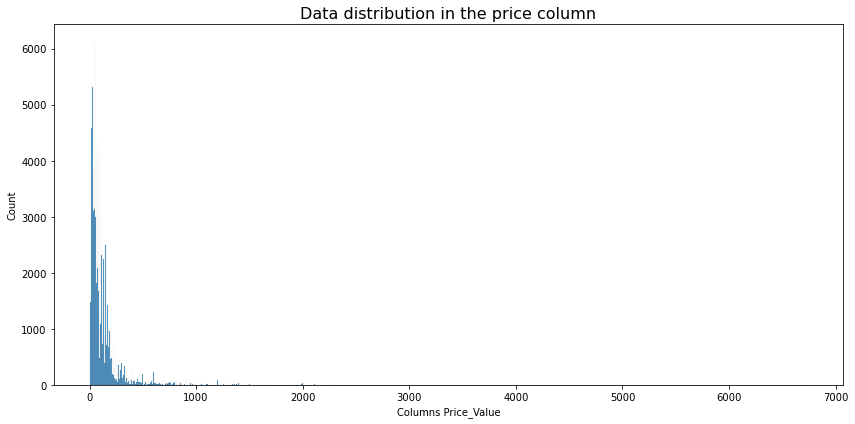

In [34]:
plt.figure( figsize=(12, 6))
sns.histplot(data=df,x='price')
plt.title('Data distribution in the price column', size=16)
plt.xlabel('Columns Price_Value')
plt.tight_layout()
plt.show()

**Price columns having long skews**

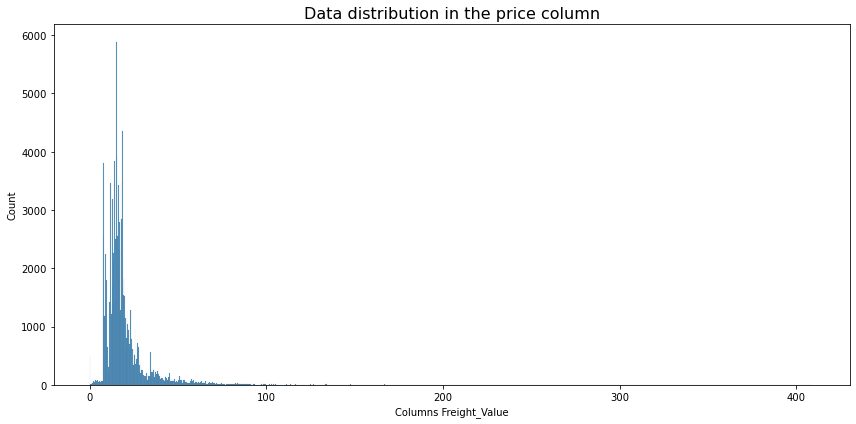

In [35]:
plt.figure( figsize=(12, 6))
sns.histplot(data=df,x='freight_value')
plt.title('Data distribution in the price column', size=16)
plt.xlabel('Columns Freight_Value')
plt.tight_layout()
plt.show()

**Freight Value and Price Value having long skews in that sense payment_value equal freight_value + price will also have long skews**

## **Data Correlation**

<AxesSubplot:title={'center':'Heatmap'}>

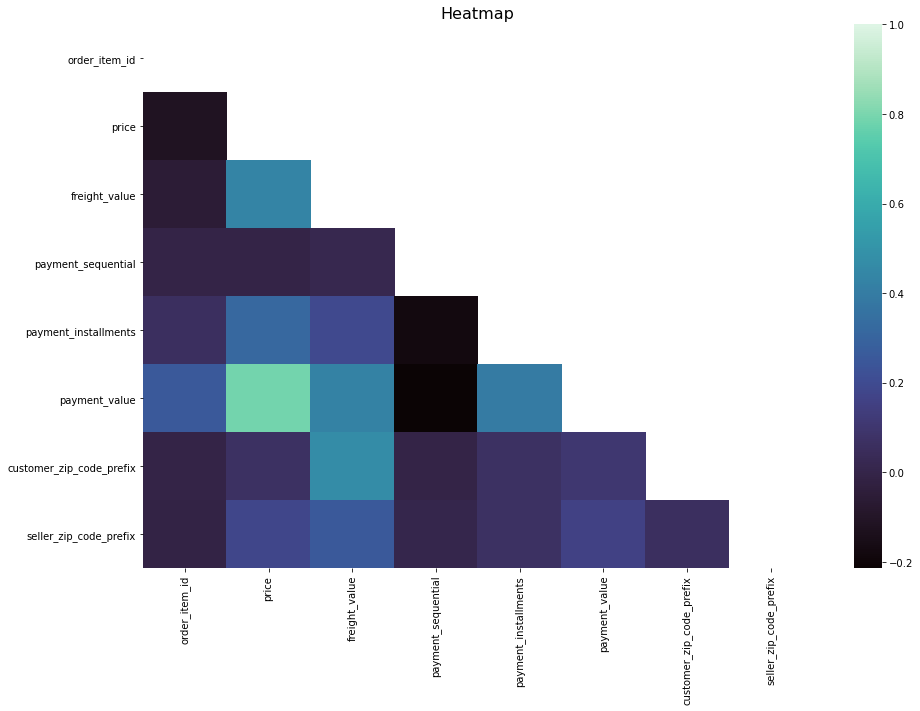

In [12]:
# Plot a heatmap to see correlation among numerical features
mask = np.zeros_like(df.corr()) 
mask[np.triu_indices_from(mask)]=True

plt.figure(figsize=(15, 10))
plt.title('Heatmap', size=16)
sns.heatmap(df.corr(method='spearman'), cmap='mako', mask=mask, vmax=1)

**Within Correlation map payment value having correlation with price, freight value, payment installment, also the price and payment installment also have correlation**

## **Data Cardinalities**

In [13]:
exclude = df.drop(columns=['customer_id','order_id','order_purchase_timestamp','product_id','seller_id','customer_unique_id'],axis=1)
cat_features = exclude.select_dtypes(include=[np.object]).columns
df[cat_features].describe()

<ipython-input-13-1c134de196d1>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat_features = exclude.select_dtypes(include=[np.object]).columns


,order_status,payment_type,product_category_name_english,customer_city,customer_state,seller_city,seller_state
count,118434,118431,115881,118434,118434,117604,117604
unique,8,5,71,4119,27,611,23
top,delivered,credit_card,bed_bath_table,sao paulo,SP,sao paulo,SP
freq,115038,87286,11823,18738,49967,29157,83854


In [14]:
for i in cat_features:
    print(f' {i}:', df[i].unique())
    print()

 order_status: ['delivered' 'shipped' 'canceled' 'invoiced' 'processing' 'unavailable'
 'created' 'approved']

 payment_type: ['credit_card' 'voucher' 'boleto' 'debit_card' 'not_defined' nan]

 product_category_name_english: ['housewares' 'baby' 'cool_stuff' 'sports_leisure' 'toys'
 'furniture_decor' 'perfumery' 'health_beauty' 'pet_shop' 'music'
 'computers' 'construction_tools_construction' 'signaling_and_security'
 'auto' 'watches_gifts' 'audio' 'electronics' 'computers_accessories'
 'telephony' 'consoles_games' 'stationery' 'party_supplies' nan
 'fashion_male_clothing' 'fashio_female_clothing' 'food'
 'costruction_tools_tools' 'fashion_bags_accessories' 'garden_tools'
 'office_furniture' 'furniture_living_room' 'market_place'
 'bed_bath_table' 'home_confort' 'art' 'home_construction'
 'air_conditioning' 'agro_industry_and_commerce' 'fixed_telephony'
 'musical_instruments' 'luggage_accessories' 'fashion_sport'
 'fashion_shoes' 'home_appliances' 'small_appliances_home_oven_and_coffee

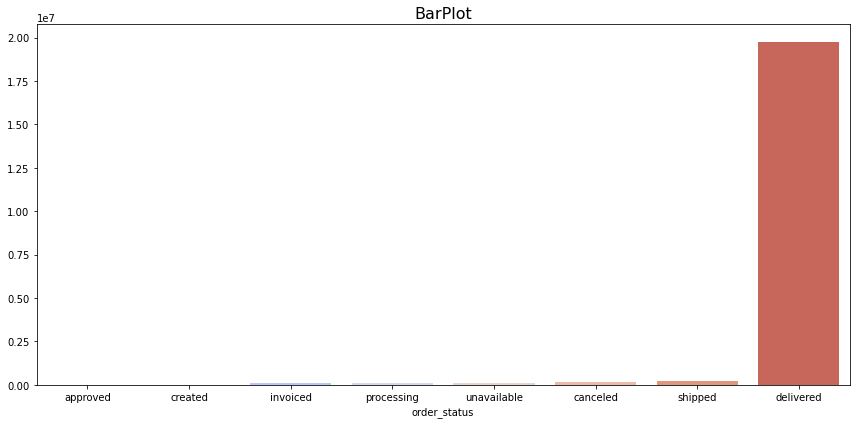

In [76]:
plt.figure(figsize=(12, 6))
df_price_cat = df.groupby('order_status')['payment_value'].sum().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('BarPlot', size=16)
plt.tight_layout()
plt.show()

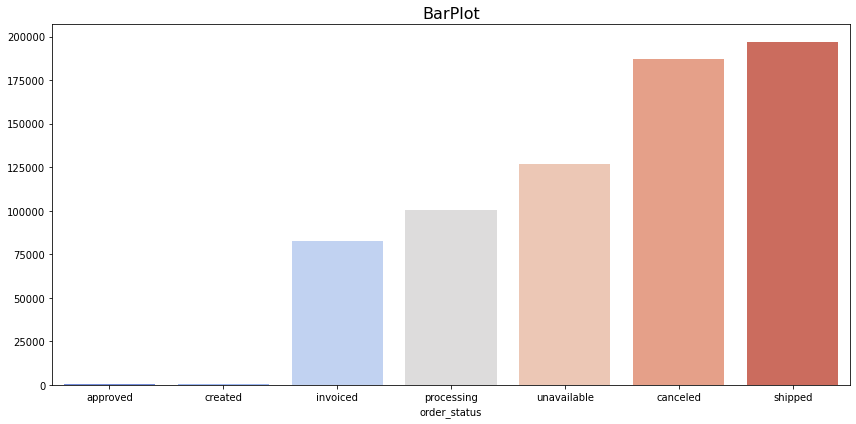

In [75]:
plt.figure(figsize=(12, 6))
df_price_cat = df[df['order_status'] != 'delivered'].groupby('order_status')['payment_value'].sum().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('BarPlot', size=16)
plt.tight_layout()
plt.show()

In [37]:
top_10_product = df['product_category_name_english'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_product = df[df['product_category_name_english'].isin(top_10_product)]

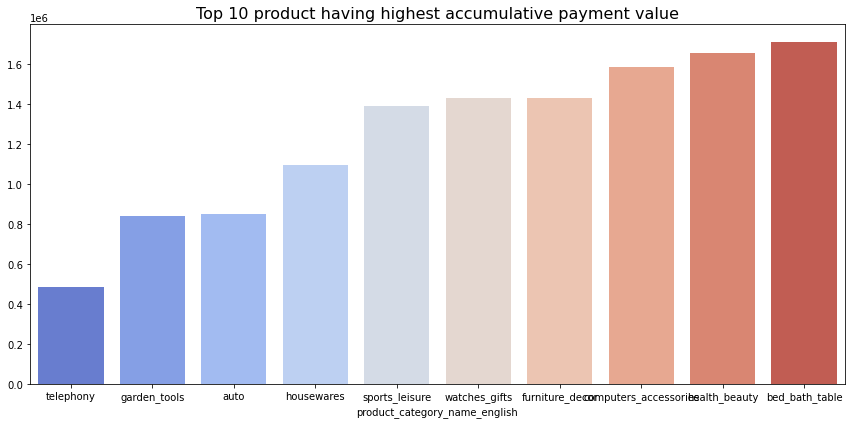

In [39]:
plt.figure(figsize=(12, 6))
df_price_cat = df_top_10_product.groupby('product_category_name_english')['payment_value'].sum().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('Top 10 product having highest accumulative payment value', size=16)
plt.tight_layout()
plt.show()

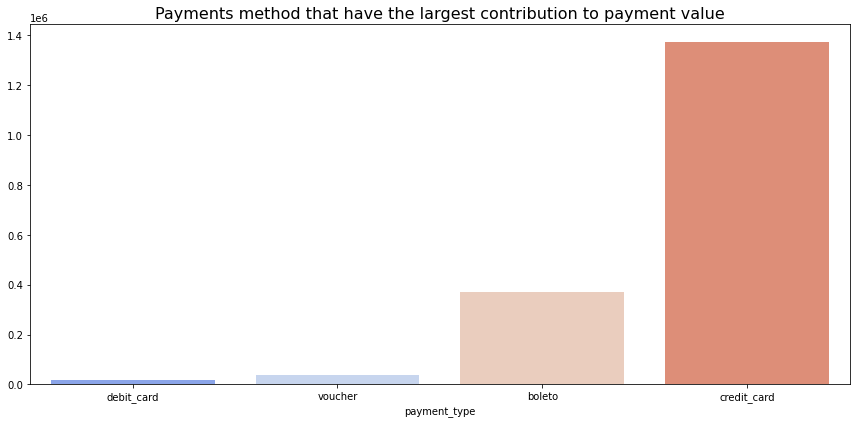

In [40]:
plt.figure(figsize=(12, 6))
df_price_cat = df_sample.groupby('payment_type')['payment_value'].sum().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('Payments method that have the largest contribution to payment value', size=16)
plt.tight_layout()
plt.show()

**Credit card and Boleto are the largest contribution in payment**

In [19]:
top_10_customer_city = df['customer_city'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_customer_city = df[df['customer_city'].isin(top_10_customer_city)]

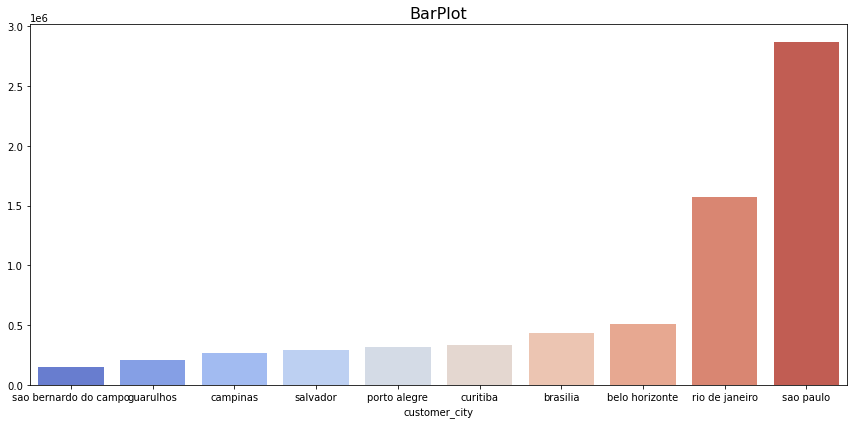

In [20]:
plt.figure(figsize=(12, 6))
df_price_cat = df_top_10_customer_city.groupby('customer_city')['payment_value'].sum().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('BarPlot', size=16)
plt.tight_layout()
plt.show()

In [21]:
top_10_customer_state = df['customer_state'].value_counts().sort_values(ascending=False).head(10).index
df_top_10_customer_state = df[df['customer_state'].isin(top_10_customer_state)]

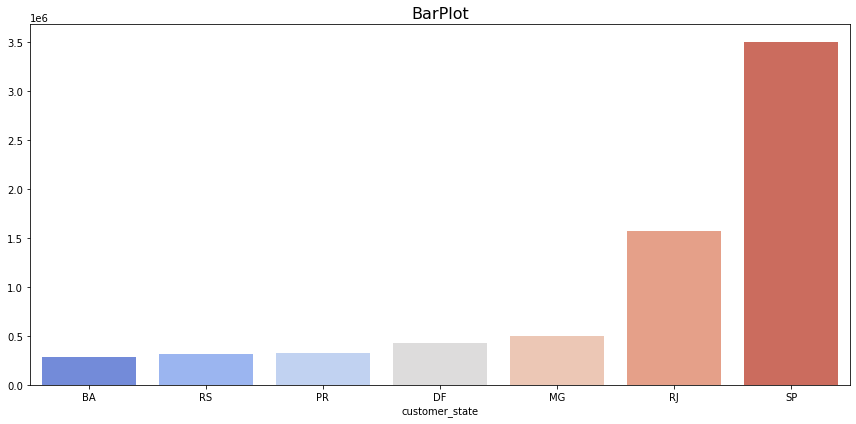

In [22]:
plt.figure(figsize=(12, 6))
df_price_cat = df_top_10_customer_city.groupby('customer_state')['payment_value'].sum().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('BarPlot', size=16)
plt.tight_layout()
plt.show()

In [23]:
# Product termahal
most_expensive_product = df.groupby('product_category_name_english')['price'].max().sort_values(ascending=False).head(10).index
df_most_expensive_product = df[df['product_category_name_english'].isin(most_expensive_product)]

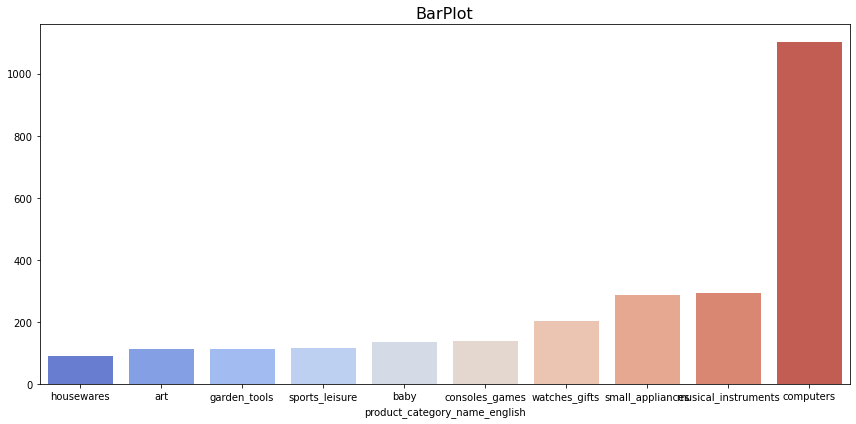

In [24]:
plt.figure(figsize=(12, 6))
df_price_cat = df_most_expensive_product.groupby('product_category_name_english')['price'].mean().sort_values()
pal = sns.color_palette('coolwarm', len(df_price_cat))
sns.barplot(x=df_price_cat.index, y=df_price_cat.values, palette=pal)    
plt.title('BarPlot', size=16)
plt.tight_layout()
plt.show()

## **Indentify missing value, outlier,anomaly,duplicates,etc**

In [25]:
df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_item_id                     830
product_id                        830
seller_id                         830
price                             830
freight_value                     830
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
product_category_name_english    2553
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
seller_zip_code_prefix            830
seller_city                       830
seller_state                      830
dtype: int64

In [26]:
df[df['seller_id'].isna()]['order_status'].unique() #terdapat masalah seller yang tidak ada id nya paket tidak pernah sampai

array(['unavailable', 'canceled', 'created', 'shipped', 'invoiced'],
      dtype=object)

In [33]:
df['price'].describe()

count    117604.000000
mean        120.822849
std         184.477367
min           0.850000
25%          39.900000
50%          74.900000
75%         134.900000
max        6735.000000
Name: price, dtype: float64

In [26]:
# Count IQR where so many outliers
# Freight Value, Payment Value, Price
outliers = 'price','freight_value','payment_value'
outliers_list = []
def count_outliers(columns_name_with_outliers):
    outliers_list = []
    for i in columns_name_with_outliers:
        low_outliers = df[i].describe()[4] - 1.5*abs(df[i].describe()[4] - df[i].describe()[6])
        upper_outliers =  df[i].describe()[6] + 1.5*abs(df[i].describe()[4] - df[i].describe()[6])
        print(i + f'    outliers is bellow {low_outliers}, and above {upper_outliers}')
        outliers_list.append([i,low_outliers,upper_outliers])
    for i in range(len(outliers_list)):
        outliers_count_bottom = df[df[outliers_list[i][0]] < outliers_list[i][1]][outliers_list[i][0]].count()
        outliers_count_upper = df[df[outliers_list[i][0]] > outliers_list[i][2]][outliers_list[i][0]].count()
        print(f'numbers outliers in columns {outliers_list[i][0]} is bottom outliers = {outliers_count_bottom} and upper outliers = {outliers_count_upper} ')
        
count_outliers(outliers)

price    outliers is bellow -102.6, and above 277.4
freight_value    outliers is bellow 0.9149999999999974, and above 33.355000000000004
payment_value    outliers is bellow -131.71749999999997, and above 381.8225
numbers outliers in columns price is bottom outliers = 0 and upper outliers = 8844 
numbers outliers in columns freight_value is bottom outliers = 534 and upper outliers = 12149 
numbers outliers in columns payment_value is bottom outliers = 0 and upper outliers = 9580 


In [53]:
# Category item with having price with outliers top 5 by value_counts
for i in range(len(outliers_list)):
    category_1 =df[df[outliers_list[i][0]] < outliers_list[i][1]]['product_category_name_english'].value_counts().head(5).index
    category_2 =df[df[outliers_list[i][0]] > outliers_list[i][2]]['product_category_name_english'].value_counts().head(5).index
    print(f'{[outliers_list[i][0]]} the catogeroy is {category_1} and {category_2}')

['price'] the catogeroy is Index([], dtype='object') and Index(['health_beauty', 'watches_gifts', 'sports_leisure', 'auto',
       'cool_stuff'],
      dtype='object')
['freight_value'] the catogeroy is Index(['watches_gifts', 'furniture_decor', 'garden_tools', 'health_beauty',
       'computers_accessories'],
      dtype='object') and Index(['furniture_decor', 'office_furniture', 'garden_tools', 'housewares',
       'computers_accessories'],
      dtype='object')
['payment_value'] the catogeroy is Index([], dtype='object') and Index(['computers_accessories', 'health_beauty', 'watches_gifts',
       'bed_bath_table', 'furniture_decor'],
      dtype='object')


In [54]:
# There anomaly in payment type

df[df['payment_type'] == 'not_defined']
# Need to be removed

,order_id,customer_id,order_status,order_purchase_timestamp,order_item_id,product_id,seller_id,price,freight_value,payment_sequential,...,payment_installments,payment_value,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,seller_zip_code_prefix,seller_city,seller_state
59579,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,0.0,NaN,4fa4365000c7090fcb8cad5713c6d3db,1151,sao paulo,SP,NaN,NaN,NaN
59912,4637ca194b6387e2d538dc89b124b0ee,a73c1f73f5772cf801434bf984b0b1a7,canceled,2018-09-03 14:14:25,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,0.0,NaN,968fac81e2c44fb6c1e3ac2a45e6a102,4685,sao paulo,SP,NaN,NaN,NaN
59916,c8c528189310eaa44a745b8d9d26908b,197a2a6a77da93f678ea0d379f21da0a,canceled,2018-08-28 20:05:14,NaN,NaN,NaN,NaN,NaN,1.0,...,1.0,0.0,NaN,6ba987d564bad1f9da8e14b9d3b71c8f,8042,sao paulo,SP,NaN,NaN,NaN


In [66]:
df[df['order_status'] == 'unavailable']['product_category_name_english'].value_counts()

perfumery      2
baby           2
cool_stuff     1
auto           1
electronics    1
Name: product_category_name_english, dtype: int64